#Python for GIS

**Introduction**
- Python เป็นภาษาคอมพิวเตอร์ที่เป็น tools สำคัญในงานด้านการวิเคราะห์ข้อมูลเชิงพื้นที่ โดยเฉพาะลักษณะ กระบวนการทำงานแบบ อัตโนมัติ
- รองรับด้านการจัดการข้อมูล , การประมวลผล การแสดงผล รวมไปถึงความสามารถในการพัฒนา application ต่างๆ
- ภาษาผสานใน GIS Software เช่น QGIS , ArcGIS, GRASS ช่วยเพิ่มประสิทธิภาพในการทำงาน
- Python เป็นเหมือนตัวเชื่อมประสาน การทำงานร่วมกันระหว่างนัก GIS กับ Developer
- ขยายขีดความสามารถในการเข้าถึงและวิเคราะห์ข้อมูล spatail data ในระบบงานที่ซับซ้อน เช่น งานด้าน Data science , AI
- มีการเติบโต และขยายของนักพัฒนา ทำให้มี opensource lib รองรับจำนวนมาก ส่วนหนึ่งต่อยอดจาก opensource gis เดิม รวมถึงการพัฒนาโมเดลใหม่ๆในลักษณะ GIS programming stack 


## การติดตั้งโปรแกรมและไลบารี

1. ทำการติดตั้ง lib ผ่าน pip 

In [0]:
# Install shapely
!pip install shapely
# Install geopandas
!pip install geopandas
# Install cartopy
!pip install cartopy
# Install networkx 
!pip install networkx
# Install osmnx 
!pip install osmnx
# Install statsmodels
!pip install statsmodels
# Install folium 
!pip install folium
# Install bokeh
!pip install bokeh
# Install geopy
!pip install geopy
# Install geojson lib
!pip install geojson

!pip install mapclassify
!apt install libspatialindex-dev


2. ทดสอบการติดตั้ง

In [0]:
import geopandas as gpd
print(gpd)

<module 'geopandas' from '/usr/local/lib/python3.6/dist-packages/geopandas/__init__.py'>


## Spatial Data Model

- การสร้างแบบจำลองข้อมูลเชิงพื้นที่ในระบบสารสนเทศ ประเภท Vector Model
- เรียกใช้ GeoPandas เพื่อการประมวลผลและจัดการข้อมูล geometry object 


- สร้าง geometry object ด้วย GeoSeries

In [0]:
# Import necessary modules
%matplotlib inline
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point, LineString,Polygon
import matplotlib.pyplot as plt

**- Point**

In [0]:

mwkt = gpd.GeoSeries([loads('POINT(1 2)'), loads('POINT(1.5 2.5)'), loads('POINT(2 3)')])
mwkt

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

In [0]:
mwkt2 = gpd.GeoSeries([Point(-120, 45.1), Point(-121.2, 46.14), Point(-122.9, 47.5)])
mwkt2 .crs = {'init': 'epsg:4326'}
mwkt2 

0       POINT (-120 45.1)
1    POINT (-121.2 46.14)
2     POINT (-122.9 47.5)
dtype: object

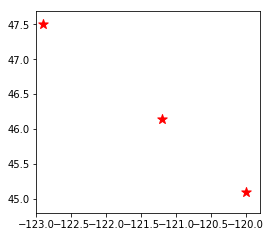

In [0]:
#plot geoseries
mwkt2.plot(marker='*', color='red', markersize=100, figsize=(4, 4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

**- Line String**

In [0]:
# Linestring
mline1 = LineString([
    Point(0, 0),
    Point(0, 1),
    Point(1, 1),
    Point(1, 2),
    Point(3, 4),
    Point(5, 6),
])
mline2 = LineString([
    Point(6, 10),
    Point(10, 14),
    Point(11, 12),
    Point(12, 15),
])



In [0]:
#สร้าง line ด้วย geoseries
mline = gpd.GeoSeries([mline1, mline2])
print(mline)



0    LINESTRING (0 0, 0 1, 1 1, 1 2, 3 4, 5 6)
1       LINESTRING (6 10, 10 14, 11 12, 12 15)
dtype: object


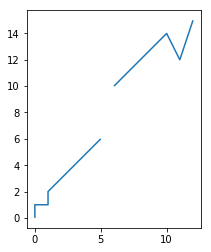

In [0]:
#plot geoseries
mline.plot()

**- Polygon**

In [0]:
#Polygon
p1 = Polygon([(1.5, 0), (1.75, 0), (1.75, 2),(1.5, 2)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

In [0]:
mpolygon = gpd.GeoSeries([p1, p2, p3])
print(mpolygon )

0    POLYGON ((1.5 0, 1.75 0, 1.75 2, 1.5 2, 1.5 0))
1                POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2                POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object


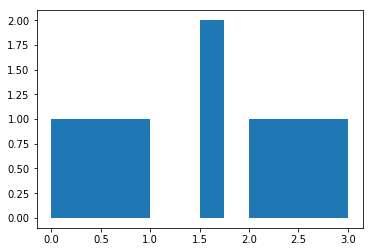

In [0]:
#plot geoseries
mpolygon .plot()

## Spatial Data Management

- Reading File : ทำการเข้าถึง GIS Data ด้วย Geopandas
- Geopandas เข้าถึงไฟล์ผ่านฟังกฺชั่น gpd.from_file() 
- รองรับการทำงานเกือบทุกประเภทไฟล์จัดเก็บข้อมูล GIS



**- ดาวน์โหลดข้อมูลตัวอย่าง**

In [0]:
# Download file
!wget -O 'province.zip' https://github.com/chaipat-ncm/pythonGIS/blob/master/data/Province.zip?raw=true

--2019-06-03 15:56:08--  https://github.com/chaipat-ncm/pythonGIS/blob/master/data/Province.zip?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chaipat-ncm/pythonGIS/raw/master/data/Province.zip [following]
--2019-06-03 15:56:09--  https://github.com/chaipat-ncm/pythonGIS/raw/master/data/Province.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chaipat-ncm/pythonGIS/master/data/Province.zip [following]
--2019-06-03 15:56:11--  https://raw.githubusercontent.com/chaipat-ncm/pythonGIS/master/data/Province.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP req

In [0]:
!unzip ./province.zip

Archive:  ./province.zip
  inflating: Province.prj            
  inflating: Province.shp            
  inflating: Province.shx            
  inflating: Province.dbf            


**- ทำการอ่าน GIS file**

In [0]:
# Import necessary modules
%matplotlib inline
import geopandas as gpd
import numpy as np

In [0]:
# Set filepath
mf = 'Province.shp'

# Read file using gpd.read_file()
gdata = gpd.read_file(mf, encoding = 'tis-620')
type(gdata)

geopandas.geodataframe.GeoDataFrame

**- ทำการตรวจสอบข้อมูล ที่นำเข้าสู่ Geodataframe**

In [0]:
# show some sample data 
gdata.head(10)

,PROV_CODE,PROV_NAMT,PROV_NAME,Area_km2_,geometry
0,10,กรุงเทพมหานคร,BANGKOK,1568.95,"POLYGON ((673511.243271844 1543337.560089368, ..."
1,11,สมุทรปราการ,SAMUT PRAKAN,960.09,"POLYGON ((687119.9477673227 1517249.831733261,..."
2,12,นนทบุรี,NONTHABURI,633.25,"POLYGON ((649103.5099873849 1546927.931480827,..."
3,13,ปทุมธานี,PATHUM THANI,1520.06,"POLYGON ((704081.656398333 1576391.725584486, ..."
4,14,พระนครศรีอยุธยา,PHRA NAKHON SI AYUTTHAYA,2534.07,"POLYGON ((666924.0312785283 1622414.506917042,..."
5,15,อ่างทอง,ANG THONG,948.68,"POLYGON ((643476.4924470172 1636455.2991575, 6..."
6,16,ลพบุรี,LOP BURI,6290.80,"POLYGON ((754259.8958616317 1723607.218240889,..."
7,17,สิงห์บุรี,SING BURI,831.57,"POLYGON ((645889.672386579 1669698.679907624, ..."
8,18,ชัยนาท,CHAI NAT,2463.64,"POLYGON ((621331.3107974514 1703368.788308561,..."
9,19,สระบุรี,SARABURI,3504.53,"POLYGON ((756345.7156804196 1663816.752038308,..."


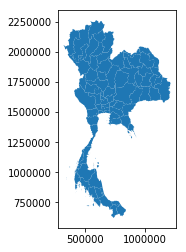

In [0]:
gdata.plot()

**- ทำการเขียน GIS file จาก GeoDataFrame**

In [0]:
# กำหนดปลายทางที่จะบันทึกไฟล์
outfp = "./province_out3.shp"

# เลือก feature บางส่วน 20 แถวแรก
selection = gdata[0:20]

print(selection)

# เขียนไฟล์ผลลัพธ์
selection.to_file(outfp)

   PROV_CODE  ...                                           geometry
0         10  ...  POLYGON ((673511.243271844 1543337.560089368, ...
1         11  ...  POLYGON ((687119.9477673227 1517249.831733261,...
2         12  ...  POLYGON ((649103.5099873849 1546927.931480827,...
3         13  ...  POLYGON ((704081.656398333 1576391.725584486, ...
4         14  ...  POLYGON ((666924.0312785283 1622414.506917042,...
5         15  ...  POLYGON ((643476.4924470172 1636455.2991575, 6...
6         16  ...  POLYGON ((754259.8958616317 1723607.218240889,...
7         17  ...  POLYGON ((645889.672386579 1669698.679907624, ...
8         18  ...  POLYGON ((621331.3107974514 1703368.788308561,...
9         19  ...  POLYGON ((756345.7156804196 1663816.752038308,...
10        20  ...  (POLYGON ((714495.0134155615 1384796.600988774...
11        21  ...  (POLYGON ((765458.0203724662 1384481.159250657...
12        22  ...  (POLYGON ((840589.0400011333 1372011.703312366...
13        23  ...  (POLYGON ((8840

In [0]:
# เขียนไฟล์รูปแบบแตกต่าง 
selection.to_file('province_out.geojson', driver='GeoJSON')
selection.to_file("spatialdb.gpkg", layer='privince', driver="GPKG")

In [0]:
result = gpd.read_file('./province_out.geojson')
print(result.crs)
print(result.head())

{'init': 'epsg:32647'}
  PROV_CODE  ...                                           geometry
0        10  ...  POLYGON ((673511.243271844 1543337.560089368, ...
1        11  ...  POLYGON ((687119.9477673227 1517249.831733261,...
2        12  ...  POLYGON ((649103.5099873849 1546927.931480827,...
3        13  ...  POLYGON ((704081.656398333 1576391.725584486, ...
4        14  ...  POLYGON ((666924.0312785283 1622414.506917042,...

[5 rows x 5 columns]


**- การจัดการข้อมูล Geomety ด้วย Geopandas**

In [0]:
#แสดงข้อมูล
print(gdata['geometry'].head(10))



0    POLYGON ((673511.243271844 1543337.560089368, ...
1    POLYGON ((687119.9477673227 1517249.831733261,...
2    POLYGON ((649103.5099873849 1546927.931480827,...
3    POLYGON ((704081.656398333 1576391.725584486, ...
4    POLYGON ((666924.0312785283 1622414.506917042,...
5    POLYGON ((643476.4924470172 1636455.2991575, 6...
6    POLYGON ((754259.8958616317 1723607.218240889,...
7    POLYGON ((645889.672386579 1669698.679907624, ...
8    POLYGON ((621331.3107974514 1703368.788308561,...
9    POLYGON ((756345.7156804196 1663816.752038308,...
Name: geometry, dtype: object


In [0]:
#เข้าถึงคุณสมบัติเชิงเรขาคณิตของ spatial data
# หาขอบเขตของชั้นข้อมูล
layer_bbox = gdata.total_bounds
# หาพื้นที่รวมของชั้นข้อมูล
total_area = sum(gdata.area)/1000000

print('boundary =',layer_bbox)
print('total area =',total_area)


boundary = [ 325210.24607093  620860.59973434 1213655.69953934 2263189.23905008]
total area = 515820.4871088155


In [0]:
# สร้างคอลัมภ์คำนวณพื้นที่ราย polygon
gdata['p_area'] = gdata.area/1000000
gdata['bbox_minx'] = (gdata.bounds.minx)
gdata['bbox_miny'] = (gdata.bounds.miny)
gdata['bbox_maxx'] = (gdata.bounds.maxx)
gdata['bbox_maxy'] = (gdata.bounds.maxy)

#gdata[['PROV_NAMT','p_area']].head()
gdata.head()

,PROV_CODE,PROV_NAMT,PROV_NAME,Area_km2_,geometry,p_area,p_bbox,bbox_minx,bbox_miny,bbox_maxx,bbox_maxy
0,10,กรุงเทพมหานคร,BANGKOK,1568.95,"POLYGON ((673511.243271844 1543337.560089368, ...",1568.951050,minx miny maxx ...,643658.314328,1.492044e+06,709550.539363,1.543364e+06
1,11,สมุทรปราการ,SAMUT PRAKAN,960.09,"POLYGON ((687119.9477673227 1517249.831733261,...",960.094128,minx miny maxx ...,656294.078019,1.490380e+06,712436.070907,1.517256e+06
2,12,นนทบุรี,NONTHABURI,633.25,"POLYGON ((649103.5099873849 1546927.931480827,...",633.250508,minx miny maxx ...,636673.958932,1.524875e+06,669363.038540,1.563657e+06
3,13,ปทุมธานี,PATHUM THANI,1520.06,"POLYGON ((704081.656398333 1576391.725584486, ...",1520.058791,minx miny maxx ...,643776.982456,1.539109e+06,710588.369882,1.579080e+06
4,14,พระนครศรีอยุธยา,PHRA NAKHON SI AYUTTHAYA,2534.07,"POLYGON ((666924.0312785283 1622414.506917042,...",2534.074243,minx miny maxx ...,634029.363712,1.560260e+06,696701.126153,1.622576e+06


In [0]:
# Maximum area
max_area = gdata['p_area'].max()

# Minimum area
min_area = gdata['p_area'].min()

# Mean area
mean_area = gdata['p_area'].mean()

print("Max area: {max}\nMin area: {min}\nMean area: {mean}".format(max=round(max_area, 2), min=round(min_area, 2), mean=round(mean_area, 2)))

Max area: 22060.57
Min area: 409.05
Mean area: 6698.97


In [0]:
 # spatial query หาจังหวัดพื้นที่มากที่สุด
  gdata.query('p_area >= 22060')

,PROV_CODE,PROV_NAMT,PROV_NAME,Area_km2_,geometry,p_area,p_bbox,bbox_minx,bbox_miny,bbox_maxx,bbox_maxy
38,50,เชียงใหม่,CHIANG MAI,22060.57,"POLYGON ((553528.711447578 2227866.168970726, ...",22060.565588,minx miny maxx ...,394992.285109,1.909848e+06,559891.535589,2.227871e+06


In [0]:
 # spatial query หาจังหวัดพื้นที่น้อยกว่า 500 ตร.กม
  gdata[['PROV_NAMT','p_area']].query('p_area <= 500')

,PROV_NAMT,p_area
60,สมุทรสงคราม,409.051229


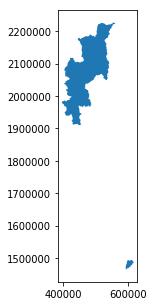

In [0]:
resmap = gdata[(gdata.p_area <= 500) | (gdata.p_area >= 22060)]
resmap.plot(figsize=(7,5))

##Spatial Reference System

- การจัดการระบบพิกัดภูมิศาสตร์ ของข้อมูล geometry object


In [0]:
#แสดงผล coordinate reference system
print(gdata.crs)
# spatial extent 
print(gdata.total_bounds)

{'init': 'epsg:32647'}
[ 325210.24607093  620860.59973434 1213655.69953934 2263189.23905008]


Text(0.5, 1.0, 'WGS 84 / UTM zone 47N ')

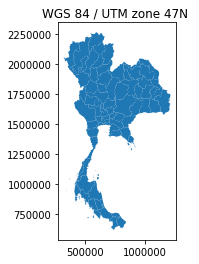

In [0]:

f, ax = plt.subplots()
ax = gdata.plot(ax=ax,figsize=(7,5))
ax.set_title("WGS 84 / UTM zone 47N ")

- ทำการแปลงระบบพิกัด

In [0]:
# reprojection

gdata_geo_wgs84  = gdata.to_crs({'init': 'epsg:4326'})
 #แสดงผล coordinate reference system
print(gdata_geo_wgs84.crs)
# spatial extent 
print(gdata_geo_wgs84.total_bounds)

{'init': 'epsg:4326'}
[ 97.34363668   5.61303785 105.63696456  20.46460385]


Text(0.5, 1.0, 'WGS 84 / Geographic coordinate system')

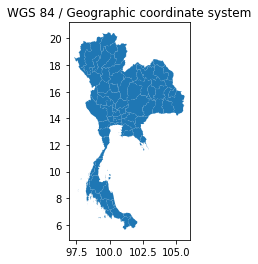

In [0]:

f, ax = plt.subplots()
ax = gdata_geo_wgs84.plot(ax=ax,figsize=(7,5))
ax.set_title("WGS 84 / Geographic coordinate system")

## Geocode

In [0]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import geocode

- เตรียมรายชื่อ สถานที่ต้องการค้นหา พิกัดตำแหน่ง

In [0]:
data = {'Site 1':'ถนนสารสิน, Witthayu, แขวงลุมพินี, เขตปทุมวัน, กรุงเทพมหานคร, 10330, ประเทศไทย',
       'Site 2':'Kamou Tokzung(豬腳飯), Soi Charoen Wiang, Sathon, แขวงสีลม, เขตบางรัก, กรุงเทพมหานคร, 10500, ประเทศไทย',
        'Site 3': 'โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัย ฝ่ายมัธยม, ซอยจุฬาลงกรณ์ 42, Sam Yan, แขวงวังใหม่, เขตปทุมวัน, กรุงเทพมหานคร, 10330, ประเทศไทย',
        'Site 4': 'วัดหัวลำโพง, ซอยหน้าวัดหัวลำโพง, แขวงสุริยวงศ์, เขตบางรัก, กรุงเทพมหานคร, 10500, ประเทศไทย',
        'Site 5': 'โรงพยาบาลจุฬาลงกรณ์, ถนนอังรีดูนังต์, Siam, แขวงปทุมวัน, เขตปทุมวัน, กรุงเทพมหานคร, 10330, ประเทศไทย ',
        'Site 6': 'Suphachalasai Stadium, ซอยจุฬาลงกรณ์ 5, แขวงวังใหม่, เขตปทุมวัน, กรุงเทพมหานคร, 10330, ประเทศไทย'
}

df = pd.DataFrame.from_dict(data, orient='index')
df.head(5)


,0
Site 1,"ถนนสารสิน, Witthayu, แขวงลุมพินี, เขตปทุมวัน, ..."
Site 2,"Kamou Tokzung(豬腳飯), Soi Charoen Wiang, Sathon,..."
Site 3,"โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัย ฝ่ายมัธยม, ..."
Site 4,"วัดหัวลำโพง, ซอยหน้าวัดหัวลำโพง, แขวงสุริยวงศ์..."
Site 5,"โรงพยาบาลจุฬาลงกรณ์, ถนนอังรีดูนังต์, Siam, แข..."


- เรียกข้อมูล geocode จาก Nominatim API 
- ค้นหาข้อมูลจาก OpenStreetMap data

In [0]:
geo = geocode(df[0], provider='nominatim')
geo.head()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,geometry,address
Site 1,POINT (100.5410291 13.7343553),"ถนนสารสิน, วิทยุ, แขวงลุมพินี, เขตปทุมวัน, กรุ..."
Site 2,POINT (100.5164317 13.719473),"Kamou Tokzung(豬腳飯), Soi Charoen Wiang, สาทร, แ..."
Site 3,POINT (100.527247839107 13.73607025),"โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัย ฝ่ายมัธยม, ..."
Site 4,POINT (100.529371082842 13.7316989),"วัดหัวลำโพง, ซอยหน้าวัดหัวลำโพง, แขวงสุริยวงศ์..."
Site 5,POINT (100.53532171595 13.73288335),"โรงพยาบาลจุฬาลงกรณ์, ถนนอังรีดูนังต์, Siam Squ..."


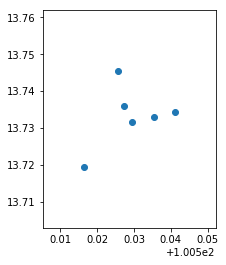

In [0]:
#ทดลอง plot แผนที่ตำแหน่งผลลัพธ์
geo.plot()

## OGC Web Feature Service

- Web feature service โปรโตคอลมาตรฐานของ OGC พัฒนาขึ้นเพื่อบริการข้อมูล spatial data 
- เชื่อมโยงการทำงานระหว่างระบบ GIS แบบ interoperability ในการเข้าถึงข้อมูลผ่าน webservice


In [0]:
# Import necessary modules
%matplotlib inline
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point, LineString,Polygon
import matplotlib.pyplot as plt

In [0]:
import requests
import geojson

In [0]:
# Define WFS Server
# load  Global Ocean Acidification Observation Network (GOA-ON)
wfs_url = "http://data.nanoos.org/geoserver/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='oa:goaoninv', outputFormat='json')

#Request GetFeature
r = requests.get(wfs_url, params=params)
# Load geojson output
wfs_geo = geojson.loads(r.content)

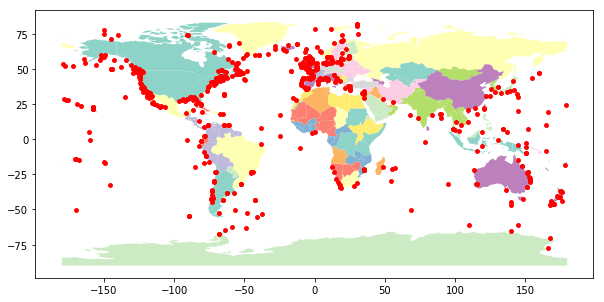

In [0]:
# Read File form dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Convet json to geopandas
wfs_gdf = gpd.GeoDataFrame.from_features(wfs_geo)
wfs_gdf.plot(ax=world.plot(cmap='Set3', figsize=(10, 6)),
             marker='o', color='red', markersize=15);

In [0]:
# checking atribute data
wfs_gdf.head(5)

,Oceans,additional_organizations,agency,city,comments,comments_about_overlaps,contact_email,contact_name,country,data_url,department,deploy_date,depth_range,duration,frequency,geometry,id,latitude,line_xy,location,longitude,meta_lists,method,method_documentation,organization,organization_abbreviation,overlaps_with,parameters,parameters_planned,platform_name,platform_name_kml,platform_type,point_xy,project,seas,sensors,source_doc,track_pt_lat,track_pt_lon,type,url
0,North Atlantic Ocean,,Israeli Ministry of Infrastructure,Haifa,,,jacobs1@ocean.org.il,Jacob Silverman,Israel,,,01/2011 -,,,1/month,POINT (35.103906 33.063656),2,33.063656,None,,35.103906,,,,National Institute of Oceangraphical and Limno...,NIOLR,,dissolved oxygen; temperature; salinity; nutri...,dissolved inorganic carbon,AK,None,FOTS,None,,None,,FixedTimeSeries,None,None,IOLR Coastal Beach Rock Monitoring,http://www.ocean.org.il/MainPageEng.asp
1,North Pacific Ocean,,National Science Foundation (NSF),,"For a full listing of parameters, contact kris...",,mengeb@oregonstate.edu,Bruce Menge,US,,,xx/2010 -,,,,POINT (-120.28 34.47),3,34.470000,None,,-120.280000,,discrete bottle samples,,"University of California, Santa Barbara",UC Santa Barbara,,pH; pCO2,,"Alegria, CA",None,FOTS,None,Ocean Margin Ecosystem Group for Acidification...,North Pacific Ocean,GIFET (pH),FixedTimeSeries,None,None,Intertidal (surf-zone) station,http://omegas.science.oregonstate.edu/
2,North Pacific Ocean,Santa Barbara Coastal Long Term Ecological Res...,George Melendez Wright Climate Change Fellowsh...,,,,lydia.kapsenberg@lifesci.ucsb.edu,Lydia Kapsenberg,US,,,02/2012 -,,3 months,2/hour,POINT (-119.3622111 34.01653611),4,34.016536,None,,-119.362211,,pH-sensor mounted to the pier piling at Anacap...,,"University of California, Santa Barbara",UC Santa Barbara,,pH; temperature,,Anacapa Island,None,FOTS,None,,North Pacific Ocean,SeaFET (pH),FixedTimeSeries,None,None,Pier-mounted sensor,http://hofmannlab.msi.ucsb.edu/
3,North Pacific Ocean,,Canadian Foundation for Innovation (CFI); Prov...,,,,denmank@uvic.ca,Kenneth Denman,Canada,,,05/2012 -,20 - 900 m,,1-2/year,POINT (-126 48.333),5,48.333000,None,,-126.000000,,Profiling,,Ocean Networks Canada,ONC,,temperature; salinity; oxygen; pCO2; pH,,Barkley Canyon,None,OP,None,,North Pacific Ocean,,FixedTimeSeries,None,None,NEPTUNE Canada Vertical Profiler,http://www.neptunecanada.ca/
4,North Atlantic Ocean,,Federal Maritime and Hydrographic Agency,,,,sieglinde.weigelt@bsh.de,Sieglinde Weigelt-Krenz,,,,xx/1989 -,3 - 30 m,,,POINT (6.35 54.16667),6,54.166670,None,,6.350000,,,,,,,pH; pCO2; salinity; temperature; dissolved oxy...,,BHS UFS EMS,None,FOTS,None,,North Sea,Sea &amp; sun CTD 48; APP Automatic Pump Photo...,FixedTimeSeries,None,None,Unmanned Fireship,


WFS service ของประเทศไทย

1. ชั้นข้อมูลขอบเขตการปกครองอำเภอ (srs:4326, polygon)

In [0]:
wfs_energy_url = 'http://mapservices.energy.go.th:80/geoserver/ows?'
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='EnergyGIS:Amphoe', outputFormat='json')

r = requests.get(wfs_energy_url, params=params)
wfs_energy_amphoe = geojson.loads(r.content)




In [0]:
print(type(wfs_energy_amphoe))
print(wfs_energy_amphoe.keys())
print(len(wfs_energy_amphoe.__geo_interface__['features']))

<class 'geojson.feature.FeatureCollection'>
dict_keys(['type', 'totalFeatures', 'crs', 'features'])
926


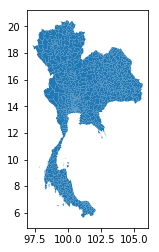

In [0]:
# covert geojson to geopandas dataframe
wfs_gdf_amphoe = gpd.GeoDataFrame.from_features(wfs_energy_amphoe, crs={'init': 'epsg:4326'})
wfs_gdf_amphoe.plot()

In [0]:
# check atrribute data
wfs_gdf_amphoe.tail(50)

,AmphoeEN,AmphoeTH,Area,ProvinceEng,ProvinceTh,geometry
876,KHLONG HOI KHONG,คลองหอยโข่ง,3.166191e+08,SONGKHLA,สงขลา,"POLYGON ((100.43953612 6.93067779, 100.4408587..."
877,MUEANG SATUN,เมืองสตูล,8.286667e+08,SATUN,สตูล,"(POLYGON ((100.04172157 6.80577445, 100.042159..."
878,KHUAN DON,ควนโดน,1.965933e+08,SATUN,สตูล,"POLYGON ((100.07904917 6.82736452, 100.0843552..."
879,BANG KHONTHI,บางคนที,6.304603e+07,SAMUT SONGKHRAM,สมุทรสงคราม,"POLYGON ((99.931676 13.50427077, 99.93193642 1..."
880,CHA-AM,ชะอำ,5.414922e+08,PHETCHABURI,เพชรบุรี,"POLYGON ((100.00079246 12.92390252, 100.002342..."
881,THA YANG,ท่ายาง,7.913742e+08,PHETCHABURI,เพชรบุรี,"POLYGON ((99.89892365 13.01482072, 99.90038264..."
882,BAN LAT,บ้านลาด,3.140304e+08,PHETCHABURI,เพชรบุรี,"POLYGON ((99.81112641 13.13126554, 99.8127205 ..."
883,BAN LAEM,บ้านแหลม,2.200955e+08,PHETCHABURI,เพชรบุรี,"POLYGON ((99.95266359999999 13.29663182, 99.95..."
884,KAENG KRACHAN,แก่งกระจาน,2.545521e+09,PHETCHABURI,เพชรบุรี,"POLYGON ((99.34409521000001 13.13690513, 99.34..."
885,MUEANG PRACHUAP KHIRI KHAN,เมืองประจวบคีรีขันธ์,8.559185e+08,PRACHUAP KHIRI KHAN,ประจวบคีรีขันธ์,"(POLYGON ((99.89314301 12.06253053, 99.8943247..."


2.ชั้นข้อมูลทางรถไฟ (srs:4326, linestring)

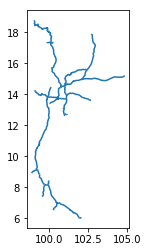

In [0]:
wfs_energy_url = 'http://mapservices.energy.go.th:80/geoserver/ows?'
params2 = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='EnergyGIS:Railway', outputFormat='json')

r = requests.get(wfs_energy_url, params=params2)
wfs_energy_railway = geojson.loads(r.content)

# covert geojson to geopandas dataframe
wfs_gdf_railway = gpd.GeoDataFrame.from_features(wfs_energy_railway, crs={'init': 'epsg:4326'})
wfs_gdf_railway.plot()

In [0]:
# check atrribute data
wfs_gdf_railway.head(5)

,NameEN,NameTH,geometry
0,RAILWAY,ทางรถไฟ,"LINESTRING (100.55314243 13.75321856, 100.5519..."
1,RAILWAY,ทางรถไฟ,"LINESTRING (100.55764086 13.75324894, 100.5576..."
2,RAILWAY,ทางรถไฟ,"LINESTRING (100.55810454 13.75318725, 100.5582..."
3,RAILWAY,ทางรถไฟ,"LINESTRING (100.54956043 13.75341962, 100.5498..."
4,RAILWAY,ทางรถไฟ,"LINESTRING (100.54990472 13.75330448, 100.5499..."


3. ชั้นข้อมูลสถานที่ราชการ (srs:4326,point)

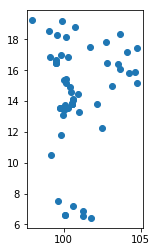

In [0]:
wfs_energy_url = 'http://mapservices.energy.go.th:80/geoserver/ows?'
params3 = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='EnergyGIS:Layer86', outputFormat='json')

r = requests.get(wfs_energy_url, params=params3)
wfs_energy_office = geojson.loads(r.content)

# covert geojson to geopandas dataframe
wfs_gdf_office = gpd.GeoDataFrame.from_features(wfs_energy_office, crs={'init': 'epsg:4326'})
wfs_gdf_office.plot()

In [0]:
# check atrribute data
wfs_gdf_office.head(5)

,Description,ID,LayerID,LayerTypeID,NAME,geometry
0,ศาลากลางจังหวัดประจวบคีรีขันธ์ ชั้น 3 ถนนสละชี...,173655,86,1,สำนักงานพลังงานจังหวัดประจวบคีรีขันธ์,POINT (99.79499817 11.81358807)
1,ศาลากลางจังหวัดชั้น 3 ถ.สุวรรณศร ต.ท่าเกษม อ.เ...,174114,86,1,สำนักงานพลังงานจังหวัดสระแก้ว,POINT (102.13846933 13.79672946)
2,275 หมู่ 2 ต.ป่าสัก อ.เมือง จ.ลำพูน,174115,86,1,สำนักงานพลังงานจังหวัดลำพูน,POINT (99.05402552 18.55100667)
3,ศาลากลางจังหวัดปัตตานี (หลังเก่า) ชั้น 2\r\nถ....,174116,86,1,สำนักงานพลังงานจังหวัดปัตตานี,POINT (101.2501158 6.86802902)
4,ถนนน่าน-พะเยา ต.ถืมตอง อ.เมืองน่าน จ.น่าน 55000,174117,86,1,สำนักงานพลัังานจังหวัดน่าน,POINT (100.71962045 18.79791277)


## Spatial Data Analysis
- การประมวลผลข้อมูลเชิงพื้นที่
- ประกอบด้วย Geoprocessing คือ การประมวลผล เพื่อสร้างข้อมูล geometry ใหม่จากข้อมูล geometry ตั้งต้น 
- และส่วนการประมวลผล ระหว่าง geometry เพื่อสร้างผลลัพธ์จากการโมเดลวิเคราะห์
- ได้แก่ Buffer , Merge , Difference, Intersection, Union เป็นต้น
- ศึกษาเพิ่มเติมจาก [link](http://geopandas.org/reference.html)

![alt text](https://docs.qgis.org/2.8/en/_images/overlay_operations.png)

1. เตรียมตัวอย่าง data ประกอบด้วย Point , Line และ Polygon

In [196]:
#check data
wfs_gdf_amphoe.geom_type.tail(10)

916    MultiPolygon
917    MultiPolygon
918    MultiPolygon
919         Polygon
920    MultiPolygon
921    MultiPolygon
922    MultiPolygon
923         Polygon
924    MultiPolygon
925    MultiPolygon
dtype: object

In [197]:
#check data
wfs_gdf_office.geom_type.tail(10)

46    Point
47    Point
48    Point
49    Point
50    Point
51    Point
52    Point
53    Point
54    Point
55    Point
dtype: object

In [198]:
#check data
wfs_gdf_railway.geom_type.tail(10)

1143    LineString
1144    LineString
1145    LineString
1146    LineString
1147    LineString
1148    LineString
1149    LineString
1150    LineString
1151    LineString
1152    LineString
dtype: object

2. intersection
- การหาส่วนซ้อนทับของ geometry จากสองชั้นข้อมูล

ระยะทางรถไฟที่ผ่าน: 173.8062743014939


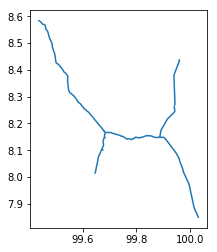

In [218]:
amphoe_se = wfs_gdf_amphoe[(wfs_gdf_amphoe['ProvinceTh'] == 'นครศรีธรรมราช')]
inter =amphoe_se['geometry'].intersection(wfs_gdf_railway['geometry'].unary_union)
r_length=inter.to_crs({'init': 'epsg:32647'}).length
print('ระยะทางรถไฟที่ผ่าน:',sum(r_length)/1000)
inter.plot()

3. Buffer
- การสร้าง polygon แสดงขอบเขต จากการกำหนดระยะห่างออกจาก geometry object

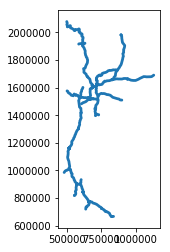

In [260]:
#แปลงพิกัด จาก lat lon  ไป UTM
railway_utm = wfs_gdf_railway.to_crs({'init': 'epsg:32647'})
# สร้าง buffer ระยะห่างจากทางรถไฟ 5 km
railway_10km = railway_utm.buffer(10000)
railway_10km.plot()

In [261]:
energy_office_utm=wfs_gdf_office.to_crs({'init': 'epsg:32647'})
# นำ output จาก buffer มาใช้ทำ spatial query
result = energy_office_utm[(energy_office_utm.within(railway_10km.geometry)) ]
                          

result

,Description,ID,LayerID,LayerTypeID,NAME,geometry
5,กระทรวงพลังงาน,174118,86,1,กองศึกษาและพัฒนาโรงไฟฟ้าฐาน,POINT (668295.1734513816 1528314.776620189)
25,555/2 ชั้น 22 อาคาร B ถนนวิภาวดีรังสิต เขตจตุจ...,174148,86,1,ตสน. * กพร.,"(POINT (668242.9339237484 1528367.515482139), ..."
30,สนับสนุนการตรวจราชการ,174154,86,1,กองตรวจและประเมินผล,POINT (668271.9489978787 1528318.659569896)
31,ชั้น 22 อาคารบี,174156,86,1,กพร.สป.พน.,POINT (668299.6390682453 1528394.623983962)


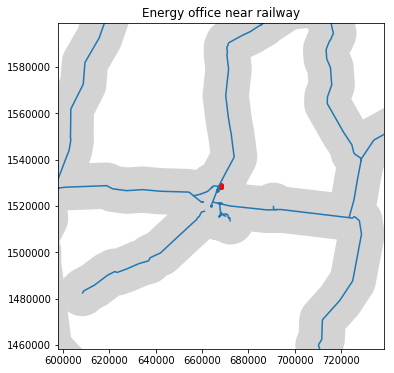

In [262]:

f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('Energy office near railway')

railway_10km.plot(ax=ax, facecolor='lightgray')
railway_utm.plot(ax=ax)

result.plot(ax=ax,marker='o', color='red', markersize=15)

res_bounds = result.geometry.bounds

plt.xlim([res_bounds.minx.min()-70000, res_bounds.maxx.max()+70000])
plt.ylim([res_bounds.miny.min()-70000, res_bounds.maxy.max()+70000]);



4. distance
- คำนวณระยะห่างในแนวระนาบ ระหว่าง geometry object

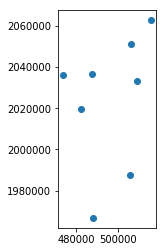

In [273]:
target  = Point(500000,2000000)

amphoe_station = wfs_gdf_amphoe[(wfs_gdf_amphoe['ProvinceTh'] == 'ลำพูน')].to_crs({'init': 'epsg:32647'}).centroid
amphoe_station.plot()

In [274]:
#คำนวณระยะห่าง
amphoe_station.distance(target)/1000

586    51.763589
587    34.360900
588    26.407973
589    35.336905
590    13.700757
591    38.400669
592    64.728098
593    44.893663
dtype: float64

## Spatial Query

- กระบวนการสืบค้นข้อมูลเชิงตำแหน่ง ที่ใช้เงื่อนไขเชิงตำแหน่งในการวิเคราะห์ข้อมูลเพื่อให้ได้ผลลัพธ์ตามต้องการ 
- โดยการนำ geometry data มาร่วมในการสร้างเงื่อนไขเพื่อทำการวิเคราะห์คุณสมบัติความสัมพันธ์จากฐานข้อมูล
- ดำเนินการบนเงื่อนไขประเภท spatial relationships 
-ได้แก่ contains(), crosses(), .intersects(),overlaps(),touches(), disjoint(), within()
- ผลลัพธ์ของการวิเคราะห์ด้วย spatial relationships function จะส่งกลับ ค่าเป็น true / false

1. Contains
- เงื่อนไขการวิเคราะห์ geometry ประเภท polygon ที่มีการบรรจุ ข้อมูล point

In [0]:
px = Point(99.05402552,18.55100667)

#จังหวัดลำพูน + พื้นที่มากกว่า 100 ตร.กม + ระยะไม่เกิน
result = wfs_gdf_amphoe[(wfs_gdf_amphoe['ProvinceTh'] == 'ลำพูน') 
                        &(wfs_gdf_amphoe['Area']>1000000)
                        &(wfs_gdf_amphoe.geometry.contains(px))
                       
                       ]
                          

result.head(10)

,AmphoeEN,AmphoeTH,Area,ProvinceEng,ProvinceTh,geometry
586,MUEANG LAMPHUN,เมืองลำพูน,5.017109e+08,LAMPHUN,ลำพูน,"POLYGON ((99.02424535 18.6719699, 99.027557130..."


2. intersect
- เงื่อนไขการหาความสัมพันธ์ของ สองชุดข้อมูล geometry ที่มีการซ้อนทับกัน

In [0]:
amphoe_x = wfs_gdf_amphoe[(wfs_gdf_amphoe['ProvinceTh'] == 'นครศรีธรรมราช')]
amphoe_x['bbox'] = wfs_gdf_amphoe.envelope
amphoe_x.head(5)
                          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AmphoeEN,AmphoeTH,Area,ProvinceEng,ProvinceTh,geometry,bbox
820,KING AMPHOE CHANG KLANG,กิ่งอำเภอช้างกลาง,2.342035e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.69722609 8.436230200000001, 99.69...","POLYGON ((99.51765759 8.288851940000001, 99.71..."
821,CHALOEM PHRAKIAT,เฉลิมพระเกียรติ,1.866243e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.94761043 8.26374539, 99.94950303 ...","POLYGON ((99.93740353 8.05311925, 100.122418 8..."
893,MUEANG NAKHON SI THAMMARAT,เมืองนครศรีธรรมราช,5.385396e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.94141165000001 8.59751947, 99.942...","POLYGON ((99.79769985999999 8.249543579999999,..."
894,PHROM KHIRI,พรหมคีรี,2.797225e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.78487319 8.61904582, 99.78816034 ...","POLYGON ((99.68224905 8.46848977, 99.94435219 ..."
895,LAN SAKA,ลานสกา,3.539750e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.72777495 8.4949376, 99.73006588 8...","POLYGON ((99.69638913 8.26049242, 99.89833253 ..."


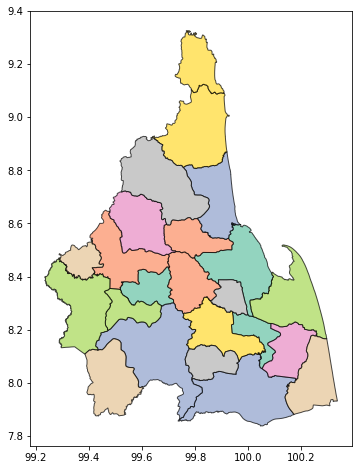

In [0]:
amphoe_x.plot(cmap='Set2', figsize=(8, 8), alpha=0.7, edgecolor='black')

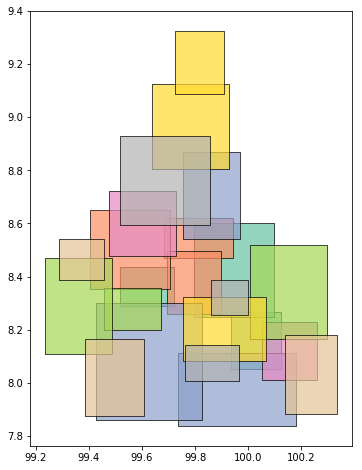

In [0]:
amphoe_x.envelope.plot(cmap='Set2', figsize=(8, 8), alpha=0.7, edgecolor='black')

In [0]:
result = amphoe_x[(amphoe_x.geometry.intersects(wfs_gdf_railway.geometry.unary_union))]
                          

result.head(3)

,AmphoeEN,AmphoeTH,Area,ProvinceEng,ProvinceTh,geometry,bbox
820,KING AMPHOE CHANG KLANG,กิ่งอำเภอช้างกลาง,2.342035e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.69722609 8.436230200000001, 99.69...","POLYGON ((99.51765759 8.288851940000001, 99.71..."
821,CHALOEM PHRAKIAT,เฉลิมพระเกียรติ,1.866243e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.94761043 8.26374539, 99.94950303 ...","POLYGON ((99.93740353 8.05311925, 100.122418 8..."
893,MUEANG NAKHON SI THAMMARAT,เมืองนครศรีธรรมราช,5.385396e+08,NAKHON SI THAMMARAT,นครศรีธรรมราช,"POLYGON ((99.94141165000001 8.59751947, 99.942...","POLYGON ((99.79769985999999 8.249543579999999,..."


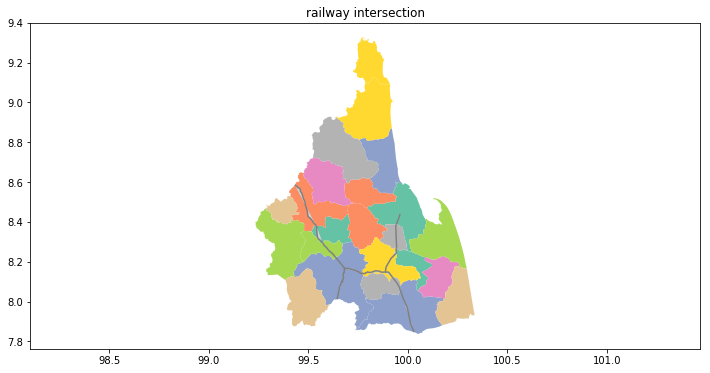

In [0]:
int_railway = amphoe_x.geometry.intersection(wfs_gdf_railway.geometry.unary_union)

f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('railway intersection')
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'

int_railway.plot(ax=ax, facecolor='lightgray', edgecolor='gray')
amphoe_x.plot(ax=ax,cmap='Set2')

plt.axis('equal');

3. with in
- ทดสอบการวิเคราะห์ จุดตำแหน่ง(point) อยู่ใน โพลีกอน(polygon)

In [0]:
# เลือก polygon ของ อำเภอ ใน 3 จังหวัดที่ต้องการ
amphoe_merge = wfs_gdf_amphoe[(wfs_gdf_amphoe['ProvinceTh'] == 'สมุทรสงคราม')
                              |(wfs_gdf_amphoe['ProvinceTh'] == 'เพชรบุรี')
                              |(wfs_gdf_amphoe['ProvinceTh'] == 'ราชบุรี')
                             ]

amphoe_merge.head(10)

,AmphoeEN,AmphoeTH,Area,ProvinceEng,ProvinceTh,geometry
731,MUEANG SAMUT SONGKHRAM,เมืองสมุทรสงคราม,1.773488e+08,SAMUT SONGKHRAM,สมุทรสงคราม,"POLYGON ((100.02580566 13.50485944, 100.026393..."
732,AMPHAWA,อัมพวา,1.686563e+08,SAMUT SONGKHRAM,สมุทรสงคราม,"POLYGON ((100.01654688 13.48087485, 100.015509..."
733,MUEANG PHETCHABURI,เมืองเพชรบุรี,2.694200e+08,PHETCHABURI,เพชรบุรี,"POLYGON ((99.93065297 13.1885813, 99.9322246 1..."
734,KHAO YOI,เขาย้อย,3.171209e+08,PHETCHABURI,เพชรบุรี,"POLYGON ((99.76307734 13.34348279, 99.76331419..."
735,NONG YA PLONG,หนองหญ้าปล้อง,1.166502e+09,PHETCHABURI,เพชรบุรี,"POLYGON ((99.6895107 13.29385658, 99.69122603 ..."
751,MUEANG RATCHABURI,เมืองราชบุรี,4.582166e+08,RATCHABURI,ราชบุรี,"POLYGON ((99.75409399 13.63450465, 99.75555598..."
752,CHOM BUENG,จอมบึง,8.943518e+08,RATCHABURI,ราชบุรี,"POLYGON ((99.47255556 13.80466627, 99.47297763..."
753,SUAN PHUENG,สวนผึ้ง,8.680755e+08,RATCHABURI,ราชบุรี,"POLYGON ((99.29641864 13.74326234, 99.2970061 ..."
754,DAMNOEN SADUAK,ดำเนินสะดวก,2.146084e+08,RATCHABURI,ราชบุรี,"POLYGON ((99.99145664 13.63998409, 99.99309804..."
755,BAN PONG,บ้านโป่ง,3.665433e+08,RATCHABURI,ราชบุรี,"POLYGON ((99.89539378000001 13.94065258, 99.89..."


In [0]:
#หาสำนักงานที่อยู่ในเขตจังหวัดทั้ง 3 โดย spatial relationship

                
result = wfs_gdf_office[(wfs_gdf_office.within(amphoe_merge.geometry.unary_union)) ]
                          

result

,Description,ID,LayerID,LayerTypeID,NAME,geometry
10,178 หมู่ 1 ต.หินกอง อ.เมือง จ.ราชบุรี 70000,174124,86,1,สำนักงานพลังงานจังหวัดราชบุรี,POINT (99.73034097 13.57012146)
37,2/100-102 หมู่ 2 ตำบลไร่ส้ม อำเภอเมือง จังหวัด...,174164,86,1,สำนักงานพลังงานจังหวัดเพชรบุรี,POINT (99.93293391 13.11190404)
39,อาคารสำนักงาน ศาลากลางหลังเก่า ชั้น 2,174170,86,1,สำนักงานพลังงานจ.สมุทรสงคราม,POINT (100.00166418 13.41286212)
44,PT,174232,86,1,สถานีบริการน้ำมัน PT,POINT (99.78556779 13.55492127)


##Thematic map
- การสร้างแผนที่เฉพาะเรื่อง จากการกำหนดเงื่อนไข ในฐานข้อมูล GIS 
- ใช้ได้ทั้ง logical operation และ spatial operation ในการสร้างเงื่อนไข
- จำแนกสีและรายละเอียด ตาม feature ของ geometry

- ตัวอย่างที่ 1

In [0]:
# Load point data
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Read File form dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(10)



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...


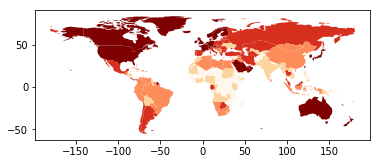

In [0]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!='Antarctica')]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

In [0]:
world['gdp_md_est'].mean()

670681.307215909

In [0]:
mean_gdp = world['gdp_md_est'].mean()
print('mean gdp =', mean_gdp )

asia_class_gdp = world[(world.pop_est>0) & (world.continent == 'Asia')
               & (world.gdp_md_est < mean_gdp)
             ]

print(' asia count = ', asia_class_gdp['name'].count() )
print('min gdp_per_cap = ', asia_class_gdp['gdp_per_cap'].min() )


#asia_class_gdp.nlargest(3, 'gdp_per_cap')
asia_class_gdp.nsmallest(10, 'gdp_per_cap')


mean gdp = 670681.307215909
 asia count =  34
min gdp_per_cap =  0.0015842751188800443


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,25248140,Asia,North Korea,PRK,40000.0,(POLYGON ((130.7800036600468 42.22000781320322...,0.001584
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51860680528867 37.36278432875879,...",0.001878
101,29384297,Asia,Nepal,NPL,71520.0,"POLYGON ((88.12044070836987 27.87654165293959,...",0.002434
157,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00000980002224 19.00000336351606,...",0.002620
108,18028549,Asia,Syria,SYR,50280.0,"POLYGON ((35.71991824722275 32.70919240979487,...",0.002789
104,8468555,Asia,Tajikistan,TJK,25810.0,"POLYGON ((67.82999962755952 37.14499400486469,...",0.003048
105,5789122,Asia,Kyrgyzstan,KGZ,21010.0,"POLYGON ((70.96231489449914 42.26615428320549,...",0.003629
90,16204486,Asia,Cambodia,KHM,58940.0,"POLYGON ((102.5849324890267 12.18659495691328,...",0.003637
24,1291358,Asia,Timor-Leste,TLS,4975.0,POLYGON ((124.9686824891162 -8.892790215697083...,0.003853
99,157826578,Asia,Bangladesh,BGD,628400.0,"POLYGON ((92.67272098182556 22.04123891854125,...",0.003982


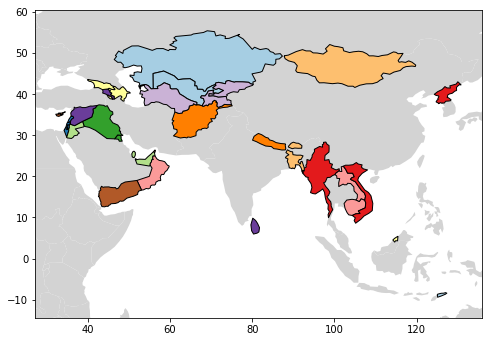

In [0]:
asia_class_gdp.plot(ax=world.plot(facecolor='lightgray', figsize=(8, 8)), 
                        cmap='Paired', edgecolor='black')

asia_bounds = asia_class_gdp.geometry.bounds

plt.xlim([asia_bounds.minx.min()-5, asia_bounds.maxx.max()+5])
plt.ylim([asia_bounds.miny.min()-5, asia_bounds.maxy.max()+5]);

- ตัวอย่างที่ 2

In [0]:
wfs_gdf_amphoe.columns

Index(['AmphoeEN', 'AmphoeTH', 'Area', 'ProvinceEng', 'ProvinceTh',
       'geometry'],
      dtype='object')

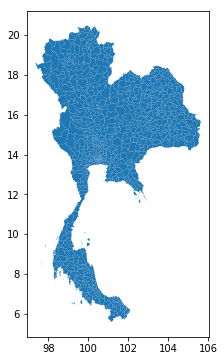

In [0]:
# Data
wfs_gdf_amphoe.plot( figsize=(14, 6))

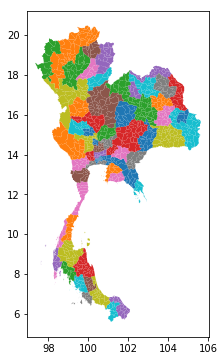

In [0]:
wfs_gdf_amphoe.plot(column='ProvinceEng', categorical=True, legend=False, figsize=(14, 6));

- ตัวอย่างที่ 3

In [0]:
# หาอำเภอที่มีพื้นที่มากที่สุด 10 อันดับแรก
wfs_gdf_amphoe['area_sqkm'] = wfs_gdf_amphoe.to_crs({'init': 'epsg:32647'}).geometry.area/1000000
#wfs_gdf_amphoe.head(10)
wfs_gdf_amphoe.nlargest(10, 'area_sqkm')

,AmphoeEN,AmphoeTH,Area,ProvinceEng,ProvinceTh,geometry,area_sqkm
686,UM PHANG,อุ้มผาง,4.819706e+09,TAK,ตาก,"POLYGON ((98.94351673 16.38400081, 98.94548073...",4819.706499
766,THONG PHA PHUM,ทองผาภูมิ,3.857682e+09,KANCHANABURI,กาญจนบุรี,"POLYGON ((98.88721630000001 15.27510156, 98.88...",3857.682218
801,BAN RAI,บ้านไร่,3.627081e+09,UTHAI THANI,อุทัยธานี,"POLYGON ((99.13393807999999 15.79784295, 99.13...",3627.081327
564,MAE CHAEM,แม่แจ่ม,3.357216e+09,CHIANG MAI,เชียงใหม่,"POLYGON ((98.26478452000001 19.15249398, 98.26...",3357.215625
767,SANGKHLA BURI,สังขละบุรี,3.164001e+09,KANCHANABURI,กาญจนบุรี,"POLYGON ((98.58614658 15.6550927, 98.58687336 ...",3164.000729
764,SI SAWAT,ศรีสวัสดิ์,2.963896e+09,KANCHANABURI,กาญจนบุรี,"POLYGON ((99.00388325 15.07068973, 99.00482039...",2963.896113
579,OMKOI,อมก๋อย,2.787321e+09,CHIANG MAI,เชียงใหม่,"POLYGON ((98.29790896 18.07885958, 98.29947887...",2787.321152
818,SAM NGAO,สามเงา,2.780060e+09,TAK,ตาก,"POLYGON ((98.67293024999999 17.83005874, 98.67...",2780.060003
762,SAI YOK,ไทรโยค,2.666343e+09,KANCHANABURI,กาญจนบุรี,"POLYGON ((98.89121686 14.51714733, 98.89201444...",2666.342767
778,MAE SARIANG,แม่สะเรียง,2.620932e+09,MAE HONG SON,แม่ฮ่องสอน,"POLYGON ((97.36424547999999 18.55883582, 97.36...",2620.931588


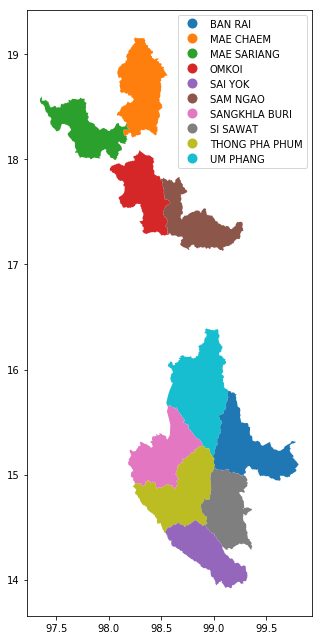

In [0]:
wfs_gdf_amphoe.nlargest(10, 'area_sqkm').plot(column='AmphoeEN', categorical=True, legend=True, figsize=(13, 9));
plt.tight_layout()

## Web Mapping

- เรียนรู้การสร้าง Web Mapping ด้วย  Bokeh

In [0]:
import sys
import numpy as np

from bokeh.plotting import figure, show,save
from bokeh.io import output_notebook
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, Range1d, BBoxTileSource
from bokeh.io import curdoc
from bokeh.models import HoverTool
from bokeh.models import WMTSTileSource
from bokeh.models import GeoJSONDataSource
from bokeh.models import LogColorMapper, LogTicker, ColorBar

from bokeh.sampledata.sample_geojson import geojson
from bokeh.palettes import RdYlGn10 as palette


import warnings
warnings.filterwarnings("ignore")

In [0]:
def getPointCoords(row, geom, coord_type):
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y
      
def getPolyCoords(row, geom, coord_type, shape_type):
    exterior = row[geom].exterior

    if coord_type == 'x':
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        return list( exterior.coords.xy[1] )

In [0]:
# data
#po_df = wfs_gdf_office.drop('geometry', axis=1).copy()
po_df =wfs_gdf_office[(wfs_gdf_office.within(amphoe_merge.geometry.unary_union)) ]
po_df['lon'] = po_df.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
po_df['lat'] = po_df.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

po_df_mercator  = po_df.to_crs({'init': 'epsg:900913'})

po_df_mercator.head()


In [0]:
po_df_mercator['x'] = po_df_mercator.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
po_df_mercator['y'] = po_df_mercator.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

po_df_mercator = po_df_mercator.drop('geometry', axis=1).copy()
po_df_mercator

,Description,ID,LayerID,LayerTypeID,NAME,lon,lat,x,y
10,178 หมู่ 1 ต.หินกอง อ.เมือง จ.ราชบุรี 70000,174124,86,1,สำนักงานพลังงานจังหวัดราชบุรี,99.730341,13.570121,1.110193e+07,1.524943e+06
37,2/100-102 หมู่ 2 ตำบลไร่ส้ม อำเภอเมือง จังหวัด...,174164,86,1,สำนักงานพลังงานจังหวัดเพชรบุรี,99.932934,13.111904,1.112448e+07,1.472520e+06
39,อาคารสำนักงาน ศาลากลางหลังเก่า ชั้น 2,174170,86,1,สำนักงานพลังงานจ.สมุทรสงคราม,100.001664,13.412862,1.113213e+07,1.506940e+06
44,PT,174232,86,1,สถานีบริการน้ำมัน PT,99.785568,13.554921,1.110808e+07,1.523203e+06


In [0]:
#OSM Tile Service
p = figure(title=" Energy Office Map"
           , x_range=(10596635,11834885), y_range=(563630,2377692)
           ,x_axis_type="mercator", y_axis_type="mercator")
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = "Source:  OSM"

p.add_tile(WMTSTileSource(url=url,attribution=attribution))


# select  feature
psource = ColumnDataSource(po_df_mercator)
#p.circle(x, y, radius=rad, fill_color=colors, fill_alpha=0.6, line_color=None)
color_mapper = LogColorMapper(palette=palette)
p.circle('x', 'y', source=psource, fill_color={'field': 'ID', 'transform': color_mapper}, size=10)
p_hover = HoverTool()
p_hover.tooltips = [
        ("Name", "@Description"),
        ("ID", "@ID"),
        ("(lat, lon)", "(@lat, @lon)"),
        ]
p.add_tools(p_hover)
output_notebook()
show(p)

Loading BokehJS ...

In [0]:

# Output filepath to HTML
output_file = r"./mapi.html"

# Save the map
save(p, output_file);

- ตัวอย่าง 2

In [0]:
# Data
top_area = wfs_gdf_amphoe.nlargest(20, 'area_sqkm')

top_area_mercator  = top_area.to_crs({'init': 'epsg:900913'})

top_area_mercator['x'] = top_area_mercator.apply(getPolyCoords, geom='geometry', coord_type='x',shape_type ='polygon', axis=1)
top_area_mercator['y'] = top_area_mercator.apply(getPolyCoords, geom='geometry', coord_type='y',shape_type ='polygon', axis=1)

top_area_mercator = top_area_mercator.drop('geometry', axis=1).copy()
top_area_mercator 

In [0]:
url = ('http://sos-s03.gistda.or.th:80/geoserver/SDS/ows?SERVICE=WMS&'
       'request=GetMap&styles=&version=1.3.0&format=image/png&dpiMode=4&'
       'crs={crs}&layers={layer}&width={width}&height={height}')


crs = 'EPSG:900913'
ymin = 563630
xmin = 10596635
ymax = 2377692
xmax = 11834885

layer = 'Hydrology,AdministrativeSDS'
width = 256
height = 256

x_range = Range1d(start=xmin, end=xmax, bounds=None)
y_range = Range1d(start=ymin, end=ymax, bounds=None)

url_set = url.format(crs=crs, width=width, height=height, layer=layer) + \
          '&bbox={XMIN},{YMIN},{XMAX},{YMAX}'


#Bokeh plot
tools= 'pan,wheel_zoom,box_zoom,reset,save'
p1 = figure( title='Thematic Map', tools=tools,
              x_range=x_range,
              lod_threshold=None,
             x_axis_location=None,
            y_axis_location=None,
              plot_width=800,
              plot_height=500,
              background_fill_color='white',
              y_range=y_range,
            tooltips=[
        ("Amphoe Name", "@AmphoeTH"), ("Province", "@ProvinceTh"),("Area", "@area_sqkm"), ("(Long, Lat)", "($x, $y)") ]
           )

tile_source = BBoxTileSource(url=url_set)
p1.add_tile(tile_source)
#p1.axis.visible = False
p1.toolbar_location = 'above'

In [0]:

gsource1 = ColumnDataSource(top_area_mercator)

color_mapper = LogColorMapper(palette=palette)


p1.grid.grid_line_color = None
p1.hover.point_policy = 'follow_mouse'


p1.patches('x', 'y', source=gsource1 ,
          fill_color={'field': 'area_sqkm', 'transform': color_mapper},
          fill_alpha=0.7, line_color='white', line_width=0.5)

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

p1.add_layout(color_bar, 'right')


output_notebook()
show(p1)

In [0]:
# Output filepath to HTML
output_file = "./map_wms2.html"

# Save the map
save(obj=p1, filename=output_file)

'/content/map_wms2.html'